# Visualizing a PPI

In [1]:
import os
import datetime
import numpy as np

from netCDF4 import Dataset

import chart

In [2]:
# file = os.path.expanduser('~/Downloads/PX-20170220-050706-E2.4-Z.nc')
file = 'blob/PX-20170220-050706-E2.4-Z.nc'

with Dataset(file, mode='r') as nc:
    name = nc.getncattr('TypeName')
    elev = np.array(nc.variables['Elevation'][:], dtype=np.float32)
    azim = np.array(nc.variables['Azimuth'][:], dtype=np.float32)
    gatewidth = np.array(nc.variables['GateWidth'][:], dtype=np.float32)
    values = np.array(nc.variables[name][:], dtype=np.float32)
    values[values < -90] = np.nan
    longitude = nc.getncattr('Longitude')
    latitude = nc.getncattr('Latitude')
    sweepElev = nc.getncattr('Elevation')
    sweepTime = nc.getncattr('Time')
    symbol = file.split('.')[-2].split('-')[-1]

## Overlay for the Plot

In [3]:
overlay = chart.atlas.Overlay((longitude, latitude))

In [4]:
radii = np.concatenate(([1.0], np.arange(10.0, 61.0, 10.0)))
overlay.setRingRadii(radii)
overlay.load()

In [5]:
r = 1.0e-3 * np.arange(values.shape[1]) * gatewidth[0]
a = np.deg2rad(azim)
t = datetime.datetime.utcfromtimestamp(sweepTime)
timestr = t.strftime('%Y/%m/%d %H:%M:%S')
title = f'{timestr} UTC  EL: {sweepElev:.2f}°'
symbol = 'Z'

In [6]:
ppi = chart.chart.Image(a, r, values, style=symbol, overlay=overlay, title=title, figsize=(800, 640), maxrange=50.0)

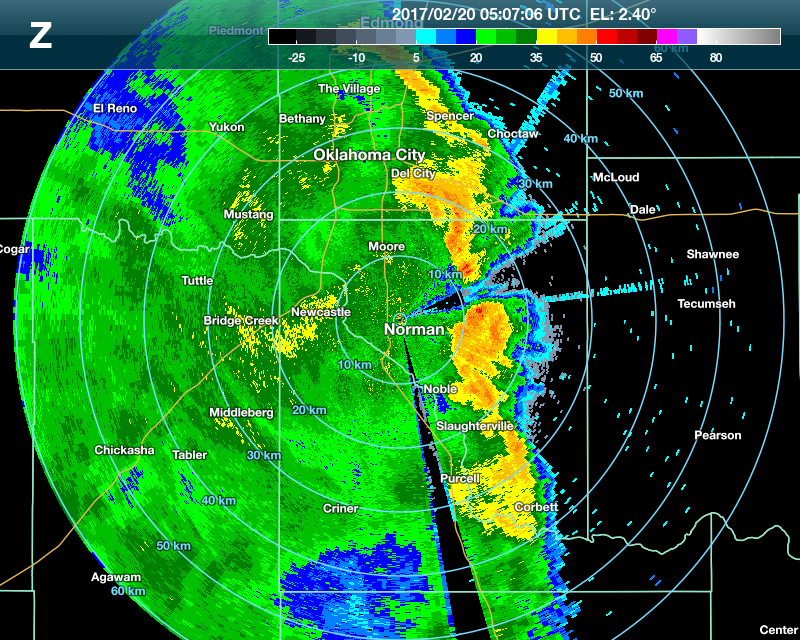

In [7]:
ppi.image()

In [8]:
file = 'blob/PX-20170220-050706-E2.4-V.nc'

with Dataset(file, mode='r') as nc:
    name = nc.getncattr('TypeName')
    elev = np.array(nc.variables['Elevation'][:], dtype=np.float32)
    azim = np.array(nc.variables['Azimuth'][:], dtype=np.float32)
    gatewidth = np.array(nc.variables['GateWidth'][:], dtype=np.float32)
    values = np.array(nc.variables[name][:], dtype=np.float32)
    values[values < -90] = np.nan
    longitude = nc.getncattr('Longitude')
    latitude = nc.getncattr('Latitude')
    sweepElev = nc.getncattr('Elevation')
    sweepTime = nc.getncattr('Time')
    symbol = file.split('.')[-2].split('-')[-1]

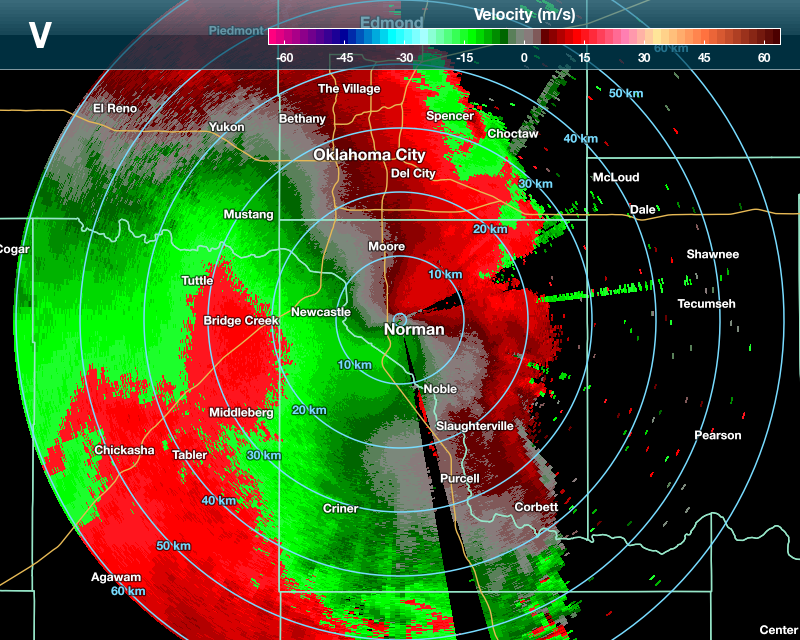

In [9]:
ppi.set_data(values, style=symbol)
ppi.image()